In [1]:
from minisom import MiniSom
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset Iris
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# classe (saída) / espécie de Iris
y = df.iloc[:, 4].values

# variáveis independentes (entradas) / comps sepal e petal
X = df.iloc[:, [0,1,2,3]].values

In [3]:
# normalizando entrada   --> muito relevante porque o método se baseia em distância

# valores com média = 0 e std = 1
Xn1 = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# valores em [0, 1)
Xn2 = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [4]:
# parâmetros para plotar o gráfico
dicion = {'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica':2}
label_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
markers = ['o', 's', 'D']
colors = ['red', 'green', 'blue', 'yellow']

In [5]:
# se desejar verificar a classe/objeto
??MiniSom

Init signature:
MiniSom(
    x,
    y,
    input_len,
    sigma=1.0,
    learning_rate=0.5,
    decay_function=<function asymptotic_decay at 0x0000022721D159E0>,
    neighborhood_function='gaussian',
    topology='rectangular',
    activation_distance='euclidean',
    random_seed=None,
)
Docstring:      <no docstring>
Source:        
class MiniSom(object):
    def __init__(self, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=None):
        """Initializes a Self Organizing Maps.

        A rule of thumb to set the size of the grid for a dimensionality
        reduction task is that it should contain 5*sqrt(N) neurons
        where N is the number of samples in the dataset to analyze.

        E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
        hence a map 8-by-8 should perform well.

     

In [6]:
# definindo um grid 2D com
linhas = 10
colunas = 10

# criando o modelo

# treinando o modelo
som = MiniSom(linhas, colunas, 4, sigma=1.5, learning_rate=0.5, neighborhood_function="gaussian", random_seed=1234)
som.train(X, 10000, verbose=True) 


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1640625307466058


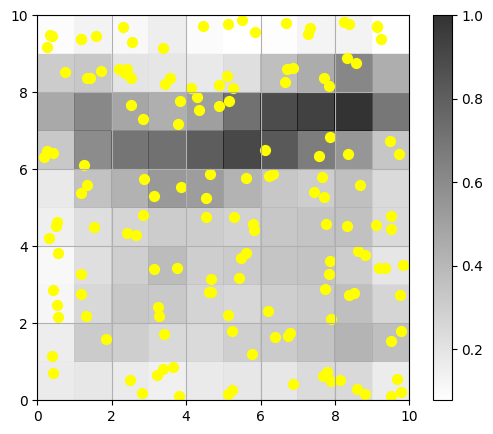

In [7]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for espec in np.unique(y):
    idx_target = y==espec
    # pontos dentro da mesma célula são espalhados aleatoriamente (para melhor visualização)
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[3])
plt.grid()
plt.show()

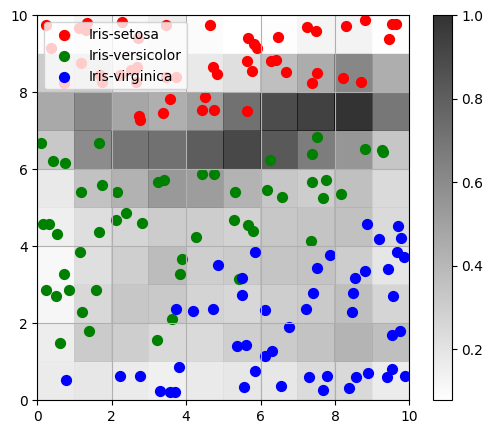

In [8]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for espec in np.unique(y):
    idx_target = y==espec
    # pontos dentro da mesma célula são espalhados aleatoriamente (para melhor visualização)
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]])
plt.legend(loc='upper left')
plt.grid()
plt.show()

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1640625307466058


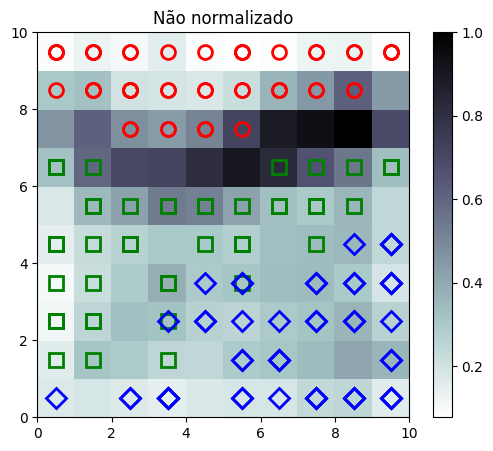

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1975954296862945


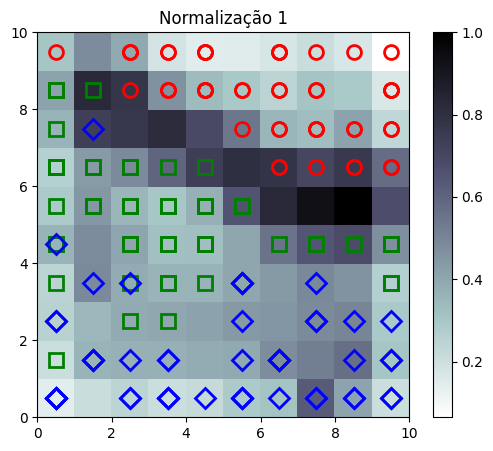

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.047876466123225256


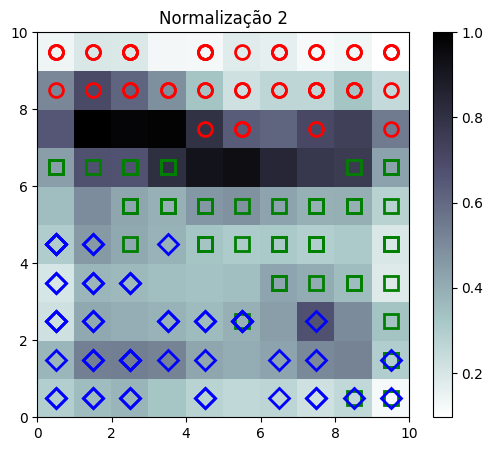

In [9]:
entradas = [X, Xn1, Xn2]
nomes = ['Não normalizado', 'Normalização 1', 'Normalização 2']

for ind in range(3):
  som = MiniSom(linhas, colunas, 4, sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=1234)
  som.train(entradas[ind], 10000, verbose=True)
  plt.figure(figsize=(6, 5))
  plt.pcolor(som.distance_map().T, cmap='bone_r')  # mapa de distância no background
  plt.colorbar()

  for i, x in enumerate(entradas[ind]):
    w = som.winner(x)
    # marca o vencedor (mais próximo)
    plt.plot(w[0]+.5, w[1]+.5, markers[dicion[y[i]]],  markerfacecolor='None',
             markeredgecolor=colors[dicion[y[i]]], markersize=10, markeredgewidth=2)
  plt.title(nomes[ind])
  plt.show()



---



## Usando o SOFM como classificador


In [10]:
# separando o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# criando o modelo SOFM
som = MiniSom(10, 10, 4, sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=1234)

# treinando o modelo
som.train(X_train, 10000, verbose=True)


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.13985893641203426


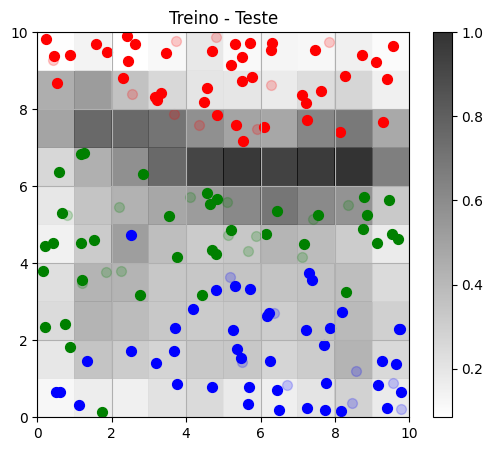

In [11]:
w_x, w_y = zip(*[som.winner(d) for d in X_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

we_x, we_y = zip(*[som.winner(d) for d in X_test])
we_x = np.array(we_x)
we_y = np.array(we_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for espec in np.unique(y_train):
    idx_target = y_train==espec
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]])

for espec in np.unique(y_test):
    idx_target = y_test==espec
    plt.scatter(we_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                we_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]],alpha=0.2)
plt.title('Treino - Teste')
plt.grid()
plt.show()

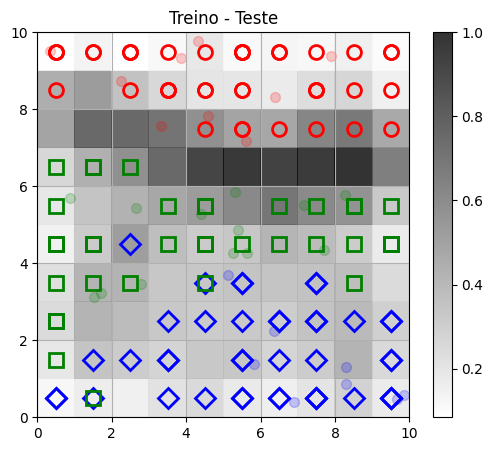

In [12]:
w_x, w_y = zip(*[som.winner(d) for d in X_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

we_x, we_y = zip(*[som.winner(d) for d in X_test])
we_x = np.array(we_x)
we_y = np.array(we_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for i, x in enumerate(X_train):
    w = som.winner(x)
    # marca o vencedor (mais próximo)
    plt.plot(w[0]+.5, w[1]+.5, markers[dicion[y_train[i]]],  markerfacecolor='None',
             markeredgecolor=colors[dicion[y_train[i]]], markersize=10, markeredgewidth=2)

for espec in np.unique(y_test):
    idx_target = y_test==espec
    plt.scatter(we_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                we_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]],alpha=0.2)
plt.title('Treino - Teste')
plt.grid()
plt.show()



---





---



##Atividades de complementação (sugestão)

1. Refaça os testes variando os parâmetros do aprendizado/SOFM: taxa de aprendizado, função vizinhança, sigma, quantidade de neurônios no grid, etc.) e verifique/analise os resultados.


2. Tente aplicar as SOFMs (este notebook) no problema de classificação (dataset) que você resolveu previamente usando as Redes Neurais Multicamadas.